# Modificaciones de  https://github.com/MIT-LCP/wfdb-python

# Demo Scripts for the wfdb-python package

Run this script from the base directory of the git repository to access the included demo files

In [ ]:
import wfdb
import numpy as np
import os
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as  pd

In [ ]:
url = "charisdb/"
senial = wfdb.rdsamp('charis2',pbdir = url)
wfdb.plotrec(senial, title = 'prueba')
#diplay(senial.__dict__)

MemoryError: 

In [ ]:
!rsync physionet.org::charisdb

@ERROR: Unknown module 'charisdb::all'
rsync error: error starting client-server protocol (code 5) at main.c(1653) [Receiver=3.1.1]


In [ ]:
!rsync -a physionet.org::mirror-setup mirror-setup

In [ ]:
!rsync physionet.org::charisdb /home/pic/Escritorio/wfdb-python-master/carpeta/

skipping directory .


In [ ]:
# See the help documentation for the read functions

help(wfdb.rdsamp)
#help(wfdb.srdsamp)
#help(wfdb.rdann)

Help on function rdsamp in module wfdb.readwrite.records:

rdsamp(recordname, sampfrom=0, sampto=None, channels=None, physical=True, pbdir=None, m2s=True, smoothframes=True, ignoreskew=False)
    Read a WFDB record and return the signal and record descriptors as attributes in a
    Record or MultiRecord object.
    
    Usage:
    record = rdsamp(recordname, sampfrom=0, sampto=None, channels=None, physical=True, pbdir = None,
             m2s=True, smoothframes = True, ignoreskew=False)
    
    Input arguments:
    - recordname (required): The name of the WFDB record to be read (without any file extensions).
      If the argument contains any path delimiter characters, the argument will be interpreted as
      PATH/baserecord and the data files will be searched for in the local path.
    - sampfrom (default=0): The starting sample number to read for each channel.
    - sampto (default=None): The sample number at which to stop reading for each channel.
    - channels (default=all): Ind

## Accedemos a la ruta

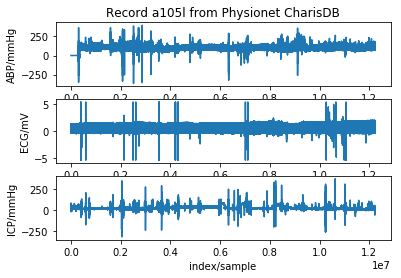

{'adcgain': [85.953, 6081.5219, 94.8784],
 'adcres': [0, 0, 0],
 'adczero': [0, 0, 0],
 'basecounter': None,
 'basedate': None,
 'baseline': [-1332, -398, -2316],
 'basetime': None,
 'blocksize': [0, 0, 0],
 'byteoffset': [None, None, None],
 'checksum': [-27139, 26935, 27046],
 'comments': ['<age>: 19  <sex>: M  <diagnoses>: (SAH/SDH/TBI)  <outcome>: Rehab'],
 'counterfreq': None,
 'd_signals': None,
 'e_d_signals': None,
 'e_p_signals': None,
 'filename': ['charis1.dat', 'charis1.dat', 'charis1.dat'],
 'fmt': ['16', '16', '16'],
 'fs': 50,
 'initvalue': [0, 0, 0],
 'nsig': 3,
 'p_signals': array([[ -1.16342652e-02,   7.87631793e-02,   2.10796135e+01],
        [ -1.16342652e-02,   6.37998196e-02,   2.05737028e+01],
        [ -4.65370610e-02,   3.10777472e-02,   2.04683047e+01],
        ..., 
        [  8.87461752e+01,   8.91388716e-01,   7.59920066e+00],
        [  8.67334473e+01,  -1.50126895e-01,   5.77581409e+00],
        [  8.53024327e+01,  -5.87024113e-02,   4.95370917e+00]]),
 '

In [ ]:
# Demo 1 - Read a wfdb record using the 'rdsamp' function into a wfdb.Record object.
# Plot the signals, and show the data.

#record = wfdb.rdsamp('sampledata/t107l') 
#wfdb.plotrec(record, title='Record a105l from Physionet Challenge 2015') 
#display(record.__dict__)


# Can also read the same files hosted on Physiobank https://physionet.org/physiobank/database/
# in the challenge/2015/training/ database subdirectory. Full url = urecord2 = wfdb.rdsamp('charis1', pbdir = 'charisdb/')
wfdb.plotrec(record2, title='Record CHARIS1 from Physionet CharisDB') 
display(record2.__dict__)



In [ ]:
len(record2.p_signals[:])

3

In [ ]:
signales = np.ndarray.flatten(record2.p_signals)
tamanio = len(signales)/3

In [ ]:
reFactorizacion = signales.reshape(tamanio,3)

In [ ]:
senialABP = []
senialECG = []
senialICP = []
for reFactor in reFactorizacion:
    senialABP.append(reFactor[0])
    senialECG.append(reFactor[1])
    senialICP.append(reFactor[2])
senialABP = np.asarray(senialABP)
senialECG = np.asarray(senialECG)
senialICP = np.asarray(senialICP)


In [ ]:
senialABP[0:100]

array([-0.01163427, -0.01163427, -0.04653706,  0.27922237,  0.16287971,
       -0.10470839,  0.        ,  0.20941677,  0.15124545, -0.06980559,
       -0.04653706,  0.01163427,  0.39556502, -0.08143986, -0.0349028 ,
        0.2326853 , -0.06980559, -0.08143986,  0.04653706,  0.48863914,
       -0.06980559,  0.37229649,  0.20941677,  0.29085663,  0.06980559,
        0.39556502,  0.15124545, -0.04653706, -0.08143986,  0.09307412,
        0.06980559, -0.08143986, -0.04653706,  0.        , -0.0349028 ,
        0.04653706,  0.36066222,  0.19778251, -0.0349028 , -0.11634265,
        0.43046781,  0.37229649,  0.16287971,  0.04653706,  0.36066222,
       -0.0349028 , -0.08143986,  0.01163427,  0.20941677,  0.        ,
        0.32575943,  0.16287971,  0.12797692, -0.08143986,  0.29085663,
        0.01163427,  0.09307412,  0.04653706,  0.        ,  0.01163427,
       -0.01163427,  0.2675881 ,  0.0349028 ,  0.11634265,  0.        ,
       -0.04653706,  0.01163427,  0.31412516,  0.04653706,  0.  

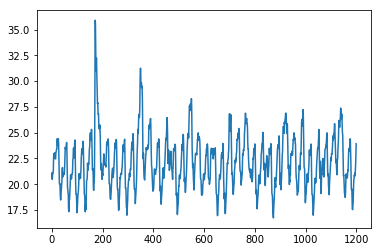

In [ ]:
plt.plot(senialICP[0:1200])
plt.show()

In [ ]:
senialICP[0:1200]

array([ 21.07961348,  20.57370276,  20.46830469, ...,  21.95441744,
        22.9873185 ,  23.9253613 ])

In [ ]:
#Guardar datos en CSV

In [ ]:
df = pd.DataFrame(reFactorizacion,columns = ['ABP', 'ECG', 'ICP'])

In [ ]:
df.to_csv('charis.csv')

In [ ]:
# Demo 2 - Read certain channels and sections of the WFDB record using the simplified 'srdsamp' function
# which returns a numpy array and a dictionary. Show the data.
signals, fields=wfdb.srdsamp('sampledata/s0010_re', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000)
display(signals)
display(fields)

# Can also read the same files hosted on Physiobank 
signals2, fields2=wfdb.srdsamp('s0010_re', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000, pbdir = 'ptbdb/patient001/')

In [ ]:
# Demo 3 - Read a WFDB header file only (without the signals)
record = wfdb.rdheader('sampledata/drive02')
display(record.__dict__)

# Can also read the same file hosted on Physiobank
record2 = wfdb.rdheader('drive02', pbdir = 'drivedb')

In [ ]:
# Demo 4 - Read part of a WFDB annotation file into a wfdb.Annotation object, and plot the samples
annotation = wfdb.rdann('sampledata/100', 'atr', sampfrom = 100000, sampto = 110000)
annotation.fs = 360
wfdb.plotann(annotation, timeunits = 'minutes')

# Can also read the same file hosted on PhysioBank 
annotation2 = wfdb.rdann('100', 'atr', sampfrom = 100000, sampto = 110000, pbdir = 'mitdb')

In [ ]:
# Demo 5 - Read a WFDB record and annotation. Plot all channels, and the annotation on top of channel 0.
record = wfdb.rdsamp('sampledata/100', sampto = 15000)
annotation = wfdb.rdann('sampledata/100', 'atr', sampto = 15000)

wfdb.plotrec(record, annotation = annotation, title='Record 100 from MIT-BIH Arrhythmia Database', timeunits = 'seconds')

### Multisegment waveform examples

The following sections load and plots waveforms from the MIMIC matched waveform database. These waveforms have been matched to clinical data in the MIMIC Clinical database. The input records are multi-segment (made up of multiple individual WFDB records) and relatively long.

Note that these kinds of records contain segments in which certain channels are missing. <strong>matplotlib</strong> automatically zooms in on sections without Nans in individual channels but the entire durations of the signals input into <strong>plotrec</strong> are actually plotted. 



In [ ]:
# Demo 6 - Read the multi-segment record and plot waveforms from the MIMIC matched waveform database. 
import wfdb
from IPython.display import display
record=wfdb.rdsamp('sampledata/multisegment/s25047/s25047-2704-05-04-10-44')
wfdb.plotrec(record, title='Record s25047-2704-05-04-10-44') 
display(record.__dict__)

# Can also read the same files hosted on PhysioBank (takes long to stream the many large files)
#record2 = wfdb.rdsamp('s25047-2704-05-04-10-44', pbdir = 'mimic2wdb/matched/s25047')

In [ ]:
# Demo 7 - Read the multi-segment record and plot waveforms from the MIMIC matched waveform database.
# Notice that some channels have no valid values to plot
record = wfdb.rdsamp('sampledata/multisegment/s00001/s00001-2896-10-10-00-31', sampfrom = 3000000, sampto = 4000000)
wfdb.plotrec(record, title='Record s00001/s00001-2896-10-10-00-31') 
display(record.__dict__)

# Can also read the same files hosted on PhysioBank
record2 = wfdb.rdsamp('s00001-2896-10-10-00-31', sampfrom = 3000000, sampto = 4000000, pbdir = 'mimic2wdb/matched/s00001')

### Multiple sample/frame examples

Although there can only be one base sampling frequency per record, a single wfdb record can store multiple channels with different sampling frequencies, as long as their sampling frequencies can all be expressed by an integer multiple of a base value. This is done by using the `sampsperframe` attribute in each channel, which indicates the number of samples of each channel present in each frame.

ie: To capture three signals with `fs = 120, 240, and 360 Hz` in a single record, they can be combined into a record with `fs = 120` and `sampsperframe = [1, 2, 3]`.

#### Reading Options

This package allows signals in records with multiple samples/frame to be read in two ways:
1. smoothed - An uniform mxn numpy is returned as the d_signals or p_signals field. Channels with multiple samples/frame have their values averaged within each frame. This is like the behaviour of the `rdsamp` function of the original WFDB c package. Note that `wfdb.plotrec` only works if the record object has the `p_signals` field.
2. expanded - A list of 1d numpy arrays is returned as the e_d_signals or e_p_signals field. All samples for each channel are returned in its respective numpy array. The arrays may have different lengths depending on their `sampsperframe` values. 

Set the `smoothframes` *(default=True)* option in `rdsamp` to return the desired signal type.

In [ ]:
# Demo 8 - Read a wfdb record in which one channel has multiple samples/frame. Return a smoothed uniform array.
record = wfdb.rdsamp('sampledata/test01_00s_frame')
wfdb.plotrec(record)

In [ ]:
# Demo 9 - Read a wfdb record in which one channel has multiple samples/frame. Return a list of all the expanded samples.
record = wfdb.rdsamp('sampledata/test01_00s_frame', smoothframes = False)

display(record.e_p_signals)
# Show that different channels have different lengths. Channel 1 has 2 samples/frame, hence has 2x as many samples.
print([len(s) for s in record.e_p_signals])

# wfdb.plotrec doesn't work because the Record object is missing its p_signals field.

## Writing Records and Annotations

In [ ]:
# Demo 10 - Read a WFDB record's digital samples and create a copy via the wrsamp() instance method 
# of the Record object.

# Read a record as a Record object.
record = wfdb.rdsamp('sampledata/100', physical = False)
record.recordname = '100x'

# Call the instance method of the object
record.wrsamp()

# The new file can be read
recordx = wfdb.rdsamp('100x')

In [ ]:
# Demo 11 - Write a WFDB record without using a Record object via the gateway wrsamp function.
# This is the basic way to write physical signals to a WFDB file. 

# Read part of a record from Physiobank
sig, fields = wfdb.srdsamp('a103l', sampfrom = 50000, channels = [0,1], pbdir = 'challenge/2015/training')

# Call the gateway wrsamp function, manually inserting fields as function input parameters
wfdb.wrsamp('ecgrecord', fs = 250, units = ['mV', 'mV'], signames = ['I', 'II'], p_signals = sig, fmt = ['16', '16'])

# The new file can be read
recordecg = wfdb.rdsamp('ecgrecord')

In [ ]:
# Demo 12 - Write a WFDB record with multiple samples/frame in a channel

# Read a record as a Record object.
record = wfdb.rdsamp('sampledata/test01_00s_frame', physical = False, smoothframes=False)
record.recordname = 'test01_00s_framex'

# Call the instance method of the object with expanded=True to write the record using the e_d_signals field
record.wrsamp(expanded=True)

# The new file can be read
recordx = wfdb.rdsamp('test01_00s_framex')

In [ ]:
# Demo 13 - Read a WFDB annotation file and create a copy via the wrann() instance method
# of the Annotation object

# Read an annotation from Physiobank
annotation = wfdb.rdann('sampledata/100', 'atr')
annotation.annotator = 'cpy'

# Call the instance method of the object
annotation.wrann()

# The new file can be read
ann100copy = wfdb.rdann('100', 'cpy')

In [ ]:
# Demo 14 - Write a WFDB annotation file without using an Annotator object via the gateway wrann function.

# Read an annotation as an Annotation object
annotation = wfdb.rdann('b001', 'atr', pbdir='cebsdb')

# Call the gateway wrann function, manually inserting fields as function input parameters
wfdb.wrann('b001', 'cpy', annotation.annsamp, annotation.anntype)

# The new file can be read
annbcopy = wfdb.rdann('b001', 'cpy')

In [ ]:
# Demo 15 - View what the 'anntype' symbols mean in the standard WFDB library
wfdb.showanncodes()

## Downloading Content from Physiobank

- The downloads are made via http
- See the above demos for examples on streaming WFDB files stored in Physiobank without downloading them to local disk
- Physionet has rsync modules for downloading entire databases for users who have access to rsync.  

In [ ]:
# Demo 16 - List the Physiobank Databases

dbs = wfdb.getdblist()
display(dbs)

[[u'adfecgdb', u'Abdominal and Direct Fetal ECG Database'],
 [u'aftdb', u'AF Termination Challenge Database'],
 [u'aami-ec13', u'ANSI/AAMI EC13 Test Waveforms'],
 [u'ahadb', u'AHA Database [sample excluded record]'],
 [u'apnea-ecg', u'Apnea-ECG Database'],
 [u'chfdb', u'BIDMC Congestive Heart Failure Database'],
 [u'bpssrat', u'Blood Pressure in Salt-Sensitive Dahl Rats'],
 [u'capslpdb', u'CAP Sleep Database'],
 [u'challenge/2009/test-set-a', u'Challenge 2009 Test Set A'],
 [u'challenge/2009/test-set-b', u'Challenge 2009 Test Set B'],
 [u'challenge/2010/set-a', u'Challenge 2010 Training Set A'],
 [u'challenge/2010/set-b', u'Challenge 2010 Test Set B'],
 [u'challenge/2010/set-c', u'Challenge 2010 Test Set C'],
 [u'challenge/2011/sim', u'Challenge 2011 Pilot Set'],
 [u'challenge/2011/set-a', u'Challenge 2011 Training Set A'],
 [u'challenge/2011/set-b', u'Challenge 2011 Test Set B'],
 [u'challenge/2013/set-a', u'Challenge 2013 Training Set A'],
 [u'challenge/2013/set-b', u'Challenge 2013 

In [ ]:
# Demo 17 - Download all the WFDB records and annotations from a small Physiobank Database

# Make a temporary download directory in your current working directory
cwd = os.getcwd()
dldir = os.path.join(cwd, 'tmp_dl_dir')
# Make sure to use a new directory
while os.path.exists(dldir):
    dldir = dldir+'1'

# Download all the WFDB content
wfdb.dldatabase('ahadb', dlbasedir = dldir)

# Display the downloaded content in the folder
display(os.listdir(dldir))

HTTPError: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/lerolero

In [ ]:
# Demo 18 - Download specified files from a Physiobank database

# The files to download
filelist = ['STAFF-Studies-bibliography-2016.pdf', 'data/001a.hea', 'data/001a.dat', 'data/001b.hea', 'data/001b.dat']

# Make a temporary download directory in your current working directory
cwd = os.getcwd()
dldir = os.path.join(cwd, 'tmp_dl_dir')
# Make sure to use a new directory
while os.path.exists(dldir):
    dldir = dldir+'1'

# Download the listed files
wfdb.dldatabasefiles('staffiii', dldir, filelist)

# Display the downloaded content in the folder
display(os.listdir(dldir))
display(os.listdir(os.path.join(dldir, 'data')))

('Created local base download directory: ', '/home/pic/Escritorio/wfdb-python-master/tmp_dl_dir')
Finished downloading files


['data', 'STAFF-Studies-bibliography-2016.pdf']

['001b.hea', '001a.dat', '001b.dat', '001a.hea']

Process PoolWorker-1:
KeyboardInterrupt
Process PoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/pic/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/pic/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/pic/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
    self._target(*self._args, **self._kwargs)
  File "/home/pic/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/pic/anaconda2/lib/python2.7/multiprocessing/pool.py", line 102, in worker
    self._target(*self._args, **self._kwargs)
  File "/home/pic/anaconda2/lib/python2.7/multiprocessing/pool.py", line 102, in worker
    task = get()
    task = get()
  File "/home/pic/anaconda2/lib/python2.7/multiprocessing/queues.py", line 376, in get
    racquire()
  File "/home/pic/anaconda2/lib/python2.7/multiprocessing/queues.py"